In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [81]:
data=pd.read_csv(r"C:\Users\Acer\Downloads\processed_cricket_data (1).csv")
data.head()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting team AFG,Batting team AUS,Batting team BAN,Batting team ENG,...,Bowling team BAN,Bowling team ENG,Bowling team IND,Bowling team IRE,Bowling team NED,Bowling team NZ,Bowling team PAK,Bowling team SA,Bowling team SL,Bowling team WI
0,1,12,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2,12,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,3,16,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,4,21,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,5,26,0,282,0.0,0.0,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [82]:
import pandas as pd

# Load dataset

# Extract batting team
data["Batting Team"] = data[[col for col in data.columns if col.startswith("Batting team")]].idxmax(axis=1)
data["Batting Team"] = data["Batting Team"].str.replace("Batting team ", "")

# Extract bowling team
data["Bowling Team"] = data[[col for col in data.columns if col.startswith("Bowling team")]].idxmax(axis=1)
data["Bowling Team"] = data["Bowling Team"].str.replace("Bowling team ", "")

# Preview
print(data[["Over Number", "Batting Team", "Bowling Team"]].head())


   Over Number Batting Team Bowling Team
0            1          ENG           NZ
1            2          ENG           NZ
2            3          ENG           NZ
3            4          ENG           NZ
4            5          ENG           NZ


In [83]:
data = data.drop(columns=[col for col in data.columns if col.startswith("Batting team") or col.startswith("Bowling team")])

# Preview clean dataset
data.head()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting Team,Bowling Team
0,1,12,0,282,0.0,0.0,ENG,NZ
1,2,12,0,282,0.0,0.0,ENG,NZ
2,3,16,0,282,0.0,0.0,ENG,NZ
3,4,21,0,282,0.0,0.0,ENG,NZ
4,5,26,0,282,0.0,0.0,ENG,NZ


In [98]:
data.columns

Index(['Over Number', 'Runs Scored till that over',
       'Wickets Taken till that over', 'Total Runs', 'Runs in Last 5 Overs',
       'Wickets in Last 5 Overs', 'Batting Team', 'Bowling Team'],
      dtype='object')

In [84]:
cat_col=["Batting Team","Bowling Team"]
encoders={}
for col in cat_col:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    encoders[col]=le
print(encoders)


{'Batting Team': LabelEncoder(), 'Bowling Team': LabelEncoder()}


In [85]:
data.tail()

,Over Number,Runs Scored till that over,Wickets Taken till that over,Total Runs,Runs in Last 5 Overs,Wickets in Last 5 Overs,Batting Team,Bowling Team
17098,32,195,7,215,28.0,3.0,10,1
17099,33,206,7,215,28.0,3.0,10,1
17100,34,211,8,215,26.0,4.0,10,1
17101,35,214,8,215,26.0,3.0,10,1
17102,36,215,8,215,23.0,2.0,10,1


In [86]:
y=data["Total Runs"]
x=data.drop(columns=["Total Runs"])

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
models={
    "LinearRegression":LinearRegression(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "Ridge":Ridge(),
    "Lasso":Lasso()
}

In [89]:
def model_evaluate(true,prediction):
    mse=mean_squared_error(true,prediction)
    mae=mean_absolute_error(true,prediction)
    r2_scr=r2_score(true,prediction)
    sqrt=np.sqrt(mse)

    return mse,mae, r2_scr,sqrt

In [90]:
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    mse_train,mae_train,r2_scr_train,sqrt_train=model_evaluate(y_train,y_train_pred)
    mse_test,mae_test,r2_scr_test,sqrt_test=model_evaluate(y_test,y_test_pred)
    
    print(f"{list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])
    print(f"Model train MSE {mse_train}")
    print(f"Model train R2 score {r2_scr_train}")
    print(f"Model train MAE {mae_train}")
    print(f"Model train Sqrt {sqrt_train}")

    print(f"Model Test MSE {mse_test}")
    print(f"Model Test MAE {mae_test}")
    print(f"Model Test R2 score {r2_scr_test}")
    print(f"Model Test SQRT {sqrt_train}")
    r2_list.append(r2_scr_test)

    print("--"*30)
    print("\n")


    



LinearRegression
Model train MSE 2798.063873090815
Model train R2 score 0.438556400227906
Model train MAE 40.0424392023636
Model train Sqrt 52.89672837795183
Model Test MSE 2890.602419127673
Model Test MAE 40.15715384310447
Model Test R2 score 0.4363520632474054
Model Test SQRT 52.89672837795183
------------------------------------------------------------


KNeighborsRegressor
Model train MSE 1923.574547580763
Model train R2 score 0.6140264599354024
Model train MAE 32.59874287384885
Model train Sqrt 43.85857439065665
Model Test MSE 2970.191850336159
Model Test MAE 40.56509792458346
Model Test R2 score 0.4208326620350056
Model Test SQRT 43.85857439065665
------------------------------------------------------------


DecisionTreeRegressor
Model train MSE 0.0
Model train R2 score 1.0
Model train MAE 0.0
Model train Sqrt 0.0
Model Test MSE 2662.719087985969
Model Test MAE 26.77696579947384
Model Test R2 score 0.48078777276192664
Model Test SQRT 0.0
-----------------------------------------

In [91]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name", "R2 Score"]).sort_values(by=["R2 Score"],ascending=False)

,Model Name,R2 Score
3,RandomForestRegressor,0.723271
2,DecisionTreeRegressor,0.480788
0,LinearRegression,0.436352
5,Ridge,0.436352
6,Lasso,0.435524
1,KNeighborsRegressor,0.420833
4,AdaBoostRegressor,0.352902


In [92]:
model=RandomForestRegressor(max_depth=40)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7187164717077363

In [93]:
y_pred=model.predict(x_test)

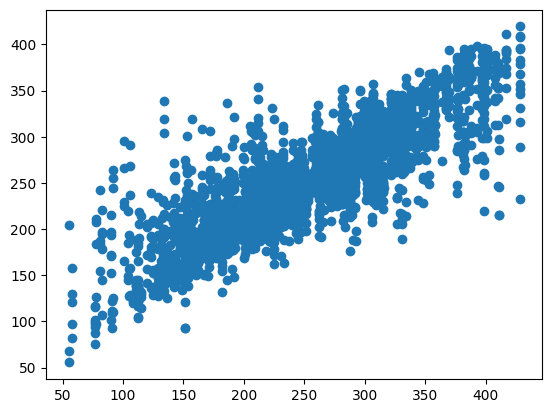

In [94]:
plt.scatter(y_test,y_pred)
plt.show()

<Axes: xlabel='Total Runs', ylabel='Total Runs'>

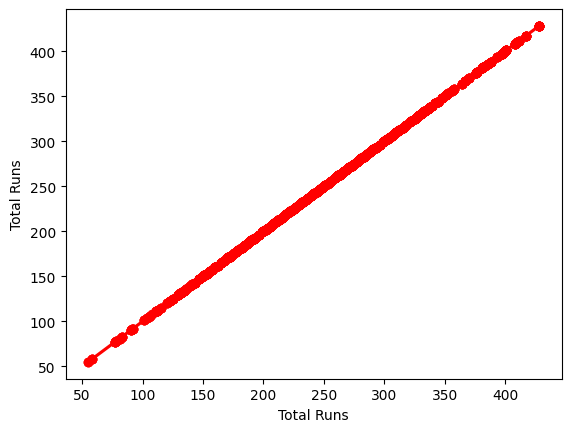

In [95]:
sns.regplot(x=y_test,y=y_test,ci=None,color="red")

In [96]:
compare=pd.DataFrame({"Actual_Predicted":y_test,"Predicted Score":y_pred,"Difference":y_test-y_pred})
compare

,Actual_Predicted,Predicted Score,Difference
10044,260,276.39,-16.39
6679,285,299.70,-14.70
7585,186,200.92,-14.92
8847,310,293.32,16.68
7640,311,292.01,18.99
...,...,...,...
15359,174,206.98,-32.98
16372,169,175.62,-6.62
63,283,273.24,9.76
5146,280,286.09,-6.09


In [97]:

import joblib

# Save trained RandomForest model
joblib.dump(model, "cricket_score_model.pkl")
joblib.dump(x.columns.tolist(), "model_features.pkl")
joblib.dump(encoders,"Labelencoder.pkl")

['Labelencoder.pkl']